In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/reanalysis/ERA5/pr_198001_202012_mon.nc')
 

data

<xarray.Dataset>
Dimensions:    (time: 492, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jun 16 11:44:48 2022: cdo monavg ../daily/pr_1980_01_da...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [3]:
#data.variables

In [4]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 431, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2015-11-16
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-01-01T01:00:00 ... 2015-12-01
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jun 16 11:44:48 2022: cdo monavg ../daily/pr_1980_01_da...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [5]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 144, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2015-09-16
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-06-01T01:00:00 ... 2015-10-01
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jun 16 11:44:48 2022: cdo monavg ../daily/pr_1980_01_da...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [6]:
new_lat=np.arange(0,49,0.5)
jjas_data=jjas_data.interp(latitude=new_lat)
jjas_data


<xarray.Dataset>
Dimensions:    (time: 144, bnds: 2, longitude: 1440, latitude: 98)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2015-09-16
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float64 0.0 0.5 1.0 1.5 2.0 ... 47.0 47.5 48.0 48.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-06-01T01:00:00 ... 2015-10-01
    tp         (time, latitude, longitude) float64 1.246e-05 ... 9.819e-05
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jun 16 11:44:48 2022: cdo monavg ../daily/pr_1980_01_da...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [7]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(longitude=slice(0,96),latitude=slice(0,49))
jjas_data





<xarray.Dataset>
Dimensions:    (time: 144, bnds: 2, longitude: 385, latitude: 98)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2015-09-16
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 95.25 95.5 95.75 96.0
  * latitude   (latitude) float64 0.0 0.5 1.0 1.5 2.0 ... 47.0 47.5 48.0 48.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-06-01T01:00:00 ... 2015-10-01
    tp         (time, latitude, longitude) float64 1.246e-05 ... 4.191e-05
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jun 16 11:44:48 2022: cdo monavg ../daily/pr_1980_01_da...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [8]:
#getting the mean for JJAS data
jjas_mean = jjas_data.tp.mean('time')
 
jjas_mean 

<xarray.DataArray 'tp' (latitude: 98, longitude: 385)>
array([[1.82350727e-05, 1.69246476e-05, 1.72090516e-05, ...,
        2.62914917e-04, 2.67225601e-04, 2.72731631e-04],
       [2.30186452e-05, 2.45118386e-05, 2.27907567e-05, ...,
        2.59391852e-04, 2.61110103e-04, 2.69113315e-04],
       [3.45915117e-05, 3.46790523e-05, 3.36547006e-05, ...,
        2.66071313e-04, 2.67548483e-04, 2.71918435e-04],
       ...,
       [7.31893658e-05, 7.54932703e-05, 7.65396782e-05, ...,
        3.71949199e-05, 3.34821311e-05, 3.73345018e-05],
       [7.26410912e-05, 7.34422787e-05, 7.60212740e-05, ...,
        5.31650465e-05, 4.92153456e-05, 5.41981456e-05],
       [8.15648072e-05, 7.81103593e-05, 7.57714013e-05, ...,
        4.41197391e-05, 5.37042381e-05, 6.99273434e-05]])
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 95.25 95.5 95.75 96.0
  * latitude   (latitude) float64 0.0 0.5 1.0 1.5 2.0 ... 47.0 47.5 48.0 48.5

In [9]:
#the data is in m so we multiply by 1000 to convert to mm/day

pr_mm = jjas_mean*1000*24
pr_mm

<xarray.DataArray 'tp' (latitude: 98, longitude: 385)>
array([[0.43764175, 0.40619154, 0.41301724, ..., 6.30995801, 6.41341442,
        6.54555915],
       [0.55244749, 0.58828413, 0.54697816, ..., 6.22540444, 6.26664247,
        6.45871956],
       [0.83019628, 0.83229725, 0.80771282, ..., 6.38571152, 6.4211636 ,
        6.52604243],
       ...,
       [1.75654478, 1.81183849, 1.83695228, ..., 0.89267808, 0.80357115,
        0.89602804],
       [1.74338619, 1.76261469, 1.82451058, ..., 1.27596112, 1.18116829,
        1.30075549],
       [1.95755537, 1.87464862, 1.81851363, ..., 1.05887374, 1.28890172,
        1.67825624]])
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 95.25 95.5 95.75 96.0
  * latitude   (latitude) float64 0.0 0.5 1.0 1.5 2.0 ... 47.0 47.5 48.0 48.5

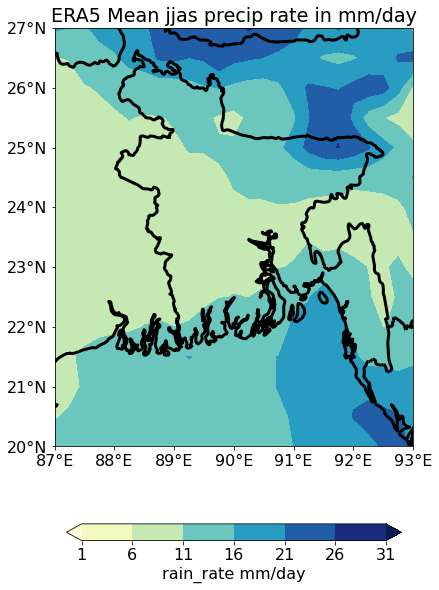

In [16]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = 16


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['longitude'][:], pr_mm['latitude'][:],pr_mm,
                levels=np.arange(1,35+1,5), transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 
plt.title('ERA5 Mean jjas precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_era5_jjas_mean.png")






In [11]:
#interpolating into new latitude
new_lat=np.arange(0,49,0.5)
data=data.interp(latitude=new_lat)
data

<xarray.Dataset>
Dimensions:    (time: 431, bnds: 2, longitude: 1440, latitude: 98)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2015-11-16
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float64 0.0 0.5 1.0 1.5 2.0 ... 47.0 47.5 48.0 48.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-01-01T01:00:00 ... 2015-12-01
    tp         (time, latitude, longitude) float64 0.0002192 ... 8.959e-05
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jun 16 11:44:48 2022: cdo monavg ../daily/pr_1980_01_da...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [12]:
#to select the x and y coordinates
data = data.sel(longitude=slice(70,100),latitude=slice(10,40))
data

<xarray.Dataset>
Dimensions:    (time: 431, bnds: 2, longitude: 121, latitude: 61)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2015-11-16
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float64 10.0 10.5 11.0 11.5 ... 38.5 39.0 39.5 40.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-01-01T01:00:00 ... 2015-12-01
    tp         (time, latitude, longitude) float64 1.644e-05 ... 8.19e-06
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jun 16 11:44:48 2022: cdo monavg ../daily/pr_1980_01_da...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [13]:
annual_mean = data.tp.mean('time')
annual_mean

<xarray.DataArray 'tp' (latitude: 61, longitude: 121)>
array([[1.28527329e-04, 1.30194346e-04, 1.31284661e-04, ...,
        1.77387530e-04, 1.88195924e-04, 2.03702132e-04],
       [1.23537092e-04, 1.23610636e-04, 1.26879176e-04, ...,
        1.75683600e-04, 1.93786578e-04, 2.05055478e-04],
       [1.16786083e-04, 1.19554600e-04, 1.22772953e-04, ...,
        1.59476337e-04, 1.53367154e-04, 1.73227942e-04],
       ...,
       [2.03833875e-04, 1.57212094e-04, 1.61309689e-04, ...,
        7.09239889e-05, 4.18086359e-05, 3.50044147e-05],
       [1.89205030e-04, 1.56704297e-04, 1.56981556e-04, ...,
        1.37877046e-05, 1.54023805e-05, 1.61929561e-05],
       [9.25607193e-05, 9.60680177e-05, 1.15184786e-04, ...,
        1.03860237e-05, 1.09818823e-05, 1.19369491e-05]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float64 10.0 10.5 11.0 11.5 ... 38.5 39.0 39.5 40.0

In [14]:
#converting from m to mm/day

annual_pr_mm = annual_mean*1000*24
annual_pr_mm

<xarray.DataArray 'tp' (latitude: 61, longitude: 121)>
array([[3.0846559 , 3.1246643 , 3.15083188, ..., 4.25730072, 4.51670219,
        4.88885117],
       [2.96489021, 2.96665526, 3.04510024, ..., 4.21640641, 4.65087786,
        4.92133148],
       [2.80286598, 2.86931039, 2.94655088, ..., 3.82743209, 3.6808117 ,
        4.15747061],
       ...,
       [4.89201299, 3.77309025, 3.87143253, ..., 1.70217573, 1.00340726,
        0.84010595],
       [4.54092072, 3.76090313, 3.76755735, ..., 0.33090491, 0.36965713,
        0.38863095],
       [2.22145726, 2.30563243, 2.76443487, ..., 0.24926457, 0.26356518,
        0.28648678]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float64 10.0 10.5 11.0 11.5 ... 38.5 39.0 39.5 40.0

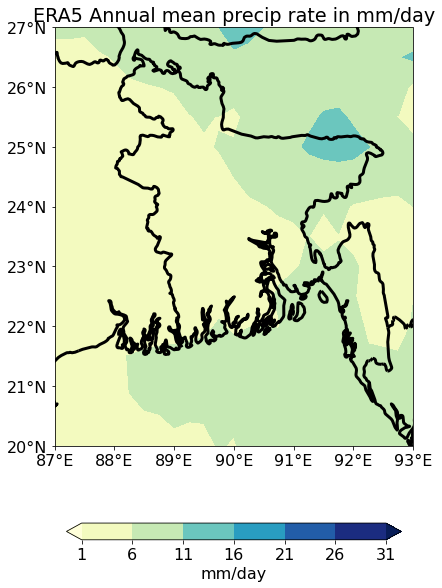

In [17]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['longitude'][:], annual_pr_mm['latitude'][:],annual_pr_mm,
                 levels=np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
#ax.add_feature(cfeature.STATES)

plt.title('ERA5 Annual mean precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_era5_annual_mean.png")

